In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [2]:
data = pd.read_csv('data/brandarrest_twitter_data.csv')

In [3]:
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,category,action_required,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,tenant_name,search_id,load_date
0,Sat Aug 24 05:28:19 +0000 2019,1165133716173283328,1165133716173283328,I have taken it up with @fccpcnigeria . Hopefu...,False,"[0, 170]","{hashtags=[], symbols=[], user_mentions=[{scre...","{iso_language_code=en, result_type=recent}","<a href=""http://twitter.com/download/android"" ...",1.165134e+18,...,Twitter,Dissatisfied Customer,NaN,NaN,NaN,NaN,NaN,cpc,d8d0c72f-ed49-4a5b-b2e2-c0a53ca304ce,2019-08-24
1,Sat Aug 24 05:22:35 +0000 2019,1165132273538260992,1165132273538260992,@sanctitybona @enugudisco @PowerUpNG @nepawaha...,False,"[73, 267]","{hashtags=[], symbols=[], user_mentions=[{scre...","{iso_language_code=en, result_type=recent}","<a href=""http://twitter.com/download/android"" ...",1.164944e+18,...,Twitter,NaN,"{media=[{id=1165132088795947009, id_str=116513...",False,NaN,NaN,NaN,cpc,d8d0c72f-ed49-4a5b-b2e2-c0a53ca304ce,2019-08-24
2,Fri Aug 09 18:01:30 +0000 2019,1159887443069456385,1159887443069456385,@ChickenRepublic Dear @fccpcnigeria kindly advise,False,"[17, 49]","{hashtags=[], symbols=[], user_mentions=[{scre...","{iso_language_code=en, result_type=recent}","<a href=""http://twitter.com/download/iphone"" r...",1.159790e+18,...,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,cpc,d8d0c72f-ed49-4a5b-b2e2-c0a53ca304ce,2019-08-09
3,Fri Aug 09 17:48:03 +0000 2019,1159884055481110528,1159884055481110528,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...,False,"[53, 53]","{hashtags=[], symbols=[], user_mentions=[{scre...","{iso_language_code=und, result_type=recent}","<a href=""http://twitter.com/download/iphone"" r...",1.159884e+18,...,Twitter,NaN,"{media=[{id=1159884046643671046, id_str=115988...",False,NaN,NaN,NaN,cpc,d8d0c72f-ed49-4a5b-b2e2-c0a53ca304ce,2019-08-09
4,Fri Aug 09 17:47:12 +0000 2019,1159883842725044225,1159883842725044225,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...,False,"[40, 53]","{hashtags=[], symbols=[], user_mentions=[{scre...","{iso_language_code=und, result_type=recent}","<a href=""http://twitter.com/download/iphone"" r...",1.159883e+18,...,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,cpc,d8d0c72f-ed49-4a5b-b2e2-c0a53ca304ce,2019-08-09


In [4]:
tweets = data[['created_at','full_text']]
tweets.head()

,created_at,full_text
0,Sat Aug 24 05:28:19 +0000 2019,I have taken it up with @fccpcnigeria . Hopefu...
1,Sat Aug 24 05:22:35 +0000 2019,@sanctitybona @enugudisco @PowerUpNG @nepawaha...
2,Fri Aug 09 18:01:30 +0000 2019,@ChickenRepublic Dear @fccpcnigeria kindly advise
3,Fri Aug 09 17:48:03 +0000 2019,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...
4,Fri Aug 09 17:47:12 +0000 2019,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...


In [5]:
tweets.iloc[11]

created_at                       Mon Oct 14 09:47:50 +0000 2019
full_text     @iambashua Good morning. Kindly be informed th...
Name: 11, dtype: object

# EDA

In [6]:
tweets.tail(20)

,created_at,full_text
199980,Wed Feb 27 12:50:24 +0000 2019,@Bet9jaOfficial I deposit 250 naira into my be...
199981,Wed Feb 27 12:48:32 +0000 2019,Me when I'm confused of which team to pick in ...
199982,Wed Feb 27 12:46:40 +0000 2019,Hmm @Bet9jaHelp What's the meaning of this oh ...
199983,Wed Feb 27 12:43:56 +0000 2019,@Bet9jaOfficial Abou diaby
199984,Wed Feb 27 12:32:59 +0000 2019,@BBNaija @Bet9jaOfficial Scam oh
199985,Wed Feb 27 12:27:05 +0000 2019,@Bet9jaOfficial Diaby
199986,Wed Feb 27 12:25:51 +0000 2019,@Bet9jaHelp The transaction doesn't show on th...
199987,Wed Feb 27 12:18:32 +0000 2019,@Tscopecoded Send me bookings too. Bet9ja 😁
199988,Wed Feb 27 12:15:38 +0000 2019,Our 100% fixed games are available u could be ...
199989,Wed Feb 27 12:14:11 +0000 2019,@Bet9jaHelp my account (6342375) wasn’t credit...


In [7]:
# check df shape
tweets.shape

(200000, 2)

We should check how many of our tweets are unique because there could be retweets which are multiple copies of the same tweet

In [8]:
tweets.full_text.unique().shape

(179585,)

### Finding Retweets
Find out how many tweets are retweets

In [9]:
# make a new column to highlight retweets
tweets['is_retweet'] = tweets['full_text'].apply(lambda x: x[:2]=='RT')
tweets['is_retweet'].sum()  # number of retweets

/Users/sasu/Desktop/Dev/ashPartners/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

We can also see the most frequent tweets. Count number of times a tweet is duplicated and sort.

In [10]:
# 10 most repeated tweets
tweets.groupby(['full_text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,full_text,counts
41527,@Bet9jaOfficial B,285
22074,@Bet9jaHelp,248
42147,@Bet9jaOfficial C,218
40552,@Bet9jaOfficial A,208
48397,@Bet9jaOfficial Messi,123
9937,@BBNaija @Bet9jaOfficial Bisola,117
42043,@Bet9jaOfficial Brazil,111
9187,@BBNaija @Bet9jaOfficial Alex,74
46192,@Bet9jaOfficial Ike,74
49098,@Bet9jaOfficial Neymar,68


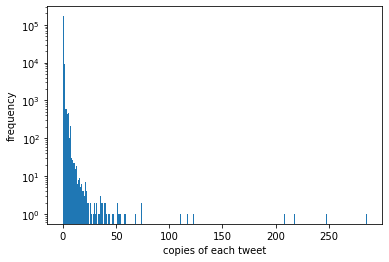

In [11]:
# number of times each tweet appears
counts = tweets.groupby(['full_text']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

Next we find out who is being tweeted at and the most common hashtags

In [12]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [13]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
tweets['retweeted'] = tweets.full_text.apply(find_retweeted)
tweets['mentioned'] = tweets.full_text.apply(find_mentioned)
tweets['hashtags'] = tweets.full_text.apply(find_hashtags)

/Users/sasu/Desktop/Dev/ashPartners/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sasu/Desktop/Dev/ashPartners/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sasu/Desktop/Dev/ashPartners/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [53]:
tweets.head()

,created_at,full_text,is_retweet,retweeted,mentioned,hashtags
0,Sat Aug 24 05:28:19 +0000 2019,I have taken it up with @fccpcnigeria . Hopefu...,False,[],"[@fccpcnigeria, @fccpcnigeria]",[]
1,Sat Aug 24 05:22:35 +0000 2019,@sanctitybona @enugudisco @PowerUpNG @nepawaha...,False,[],"[@sanctitybona, @enugudisco, @PowerUpNG, @nepa...",[]
2,Fri Aug 09 18:01:30 +0000 2019,@ChickenRepublic Dear @fccpcnigeria kindly advise,False,[],"[@ChickenRepublic, @fccpcnigeria]",[]
3,Fri Aug 09 17:48:03 +0000 2019,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...,False,[],"[@ChickenRepublic, @CocaCola, @CocaCola_NG, @f...",[]
4,Fri Aug 09 17:47:12 +0000 2019,@ChickenRepublic @CocaCola @CocaCola_NG @fccpc...,False,[],"[@ChickenRepublic, @CocaCola, @CocaCola_NG, @f...",[]


In [17]:
tweets.is_retweet.value_counts()

False    200000
Name: is_retweet, dtype: int64

#### Handle Hashtags

In this section we will perform an analysis on the hashtags. 
First we will select the column of hashtags from the dataframe, and take only the rows where there actually is a hashtag

In [19]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets.loc[
                       tweets.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [20]:
hashtags_list_df.head()

,hashtags
13,[#polarisbank]
37,[#Thread]
50,[#IfNigeriaBeatsBrazil]
51,[#IfNigeriaBeatsBrazil]
56,[#GeminiManNowOut]


Currently each row contains a list of multiple values. Next we will make a new dataframe where we take all the hashtags in `hashtags_list_df` but give each its own row.

In [21]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [22]:
flattened_hashtags_df.head()

,hashtag
0,#polarisbank
1,#Thread
2,#IfNigeriaBeatsBrazil
3,#IfNigeriaBeatsBrazil
4,#GeminiManNowOut


In [23]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

13807

In [24]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

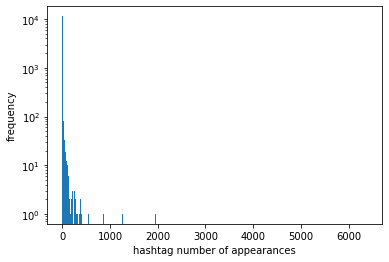

In [25]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

#### Handle Mentioned

In [29]:
# take the rows from the hashtag columns where there are actually hashtags
mentioned_list_df = tweets.loc[
                       tweets.mentioned.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentioned']]

In [31]:
mentioned_list_df.head()

,mentioned
0,"[@fccpcnigeria, @fccpcnigeria]"
1,"[@sanctitybona, @enugudisco, @PowerUpNG, @nepa..."
2,"[@ChickenRepublic, @fccpcnigeria]"
3,"[@ChickenRepublic, @CocaCola, @CocaCola_NG, @f..."
4,"[@ChickenRepublic, @CocaCola, @CocaCola_NG, @f..."


Currently each row contains a list of multiple values. Next block we will make a new dataframe where we take all the mentioned in `mentioned_list_df` but give each its own row.

In [33]:
# create dataframe where each use of hashtag gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

In [34]:
flattened_mentioned_df.head()

,mentioned
0,@fccpcnigeria
1,@fccpcnigeria
2,@sanctitybona
3,@enugudisco
4,@PowerUpNG


Currently each row contains a list of multiple values. Next block we will make a new dataframe where we take all the hashtags in `hashtags_list_df` but give each its own row.

In [35]:
# number of unique hashtags
flattened_mentioned_df['mentioned'].unique().size

38359

In [36]:
# count of appearances of each hashtag
popular_mentioned = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

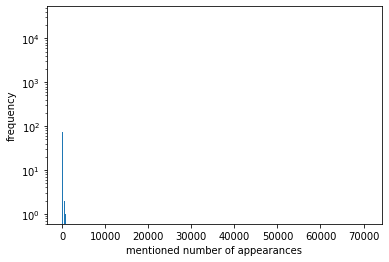

In [37]:
# number of times each hashtag appears
counts = flattened_mentioned_df.groupby(['mentioned']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('mentioned number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

#### Find Correlated Hashtags

We will need to turn the text into numeric form. It is possible to do this by transforming from a list of hashtags to a vector representing which hashtags appeared in which rows. 

In [44]:
# take hashtags which appear at least this amount of times
min_appearance = 1000
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

Next we are going to create a new column in `hashtags_df` which filters the hashtags to only the popular hashtags. We will also drop the rows where no popular hashtags appear.

In [45]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [46]:
len(popular_hashtags_list_df)

15561

Next we want to vectorise our the hashtags in each tweet like mentioned above. To do this, we create a dataframe where the hashtags contained in each row are in vector form

In [47]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [48]:
hashtag_vector_df.head()

,popular_hashtags,#Bet9ja,#bwin,#bovada,#sportpesa,#williamhill,#BET9JA,#Bet9jaBBN,#bbnaija,#bet9ja,#bet365,#merrybet,#nairabet,#soccer,#bet,#BBNaija,#soccer24
72,[#BBNaija],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76,[#BBNaija],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
130,"[#bwin, #bet365, #bet9ja]",0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
223,[#bbnaija],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
242,[#BBNaija],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

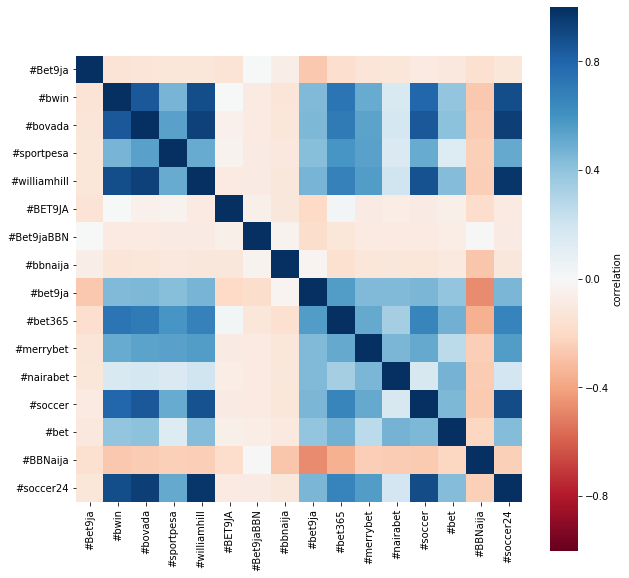

In [51]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [52]:
# save tweets df to disk
tweets.to_csv('data/tweets.csv')